# Question 1
Generate a dataset using numpy random as I had shown in the 1st class of this week. Train a linear regression model  using |x-xhat|3 as your loss function and a polynomial regression model using |x-xhat|7 as your loss function. (Note that you will need to derive the gradient descent algorithms for these functions yourselves). You are allowed to use only numpy, pandas and Matplotlib. Then train a linear regression model using the sklearn library on the same dataset. At last, plot the dataset and curves obtained from all models in the same figure.

### Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generating Dataset

In [89]:
rng = np.random.RandomState(10)
x = 10 * rng.rand(50)
X = x.reshape(-1, 1)
y = 2 * x - 5 + rng.randn(50)

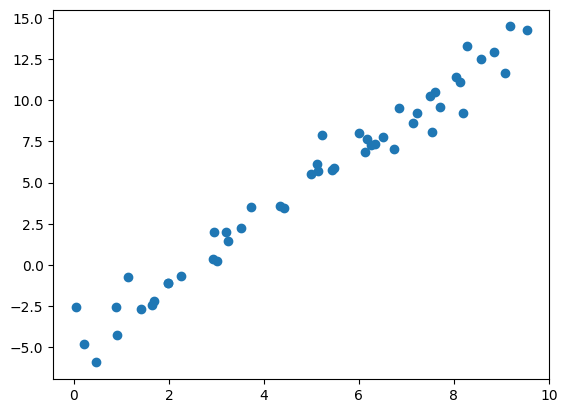

In [90]:
plt.scatter(x, y)
m=x.shape[0]

### Using Gradient Descent

In [91]:
def cost3(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)**3)

def cost7(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)**7)

In [92]:
def hypothesis3(x,w,b):
    return w*x+b

def hypothesis7(x,w,b):
    return w*x+b

In [93]:
def gradient_descent3(x, y, w, b, learning_rate, m):
    y_hat = hypothesis3(x, w, b)
    dw = (3.0 / m) * np.sum((y_hat - y) * np.abs(y_hat - y) * x)  # Adjusted gradient for w
#     print(f"dw: {dw}")
    db = (3.0 / m) * np.sum((y_hat - y) * np.abs(y_hat - y))  # Adjusted gradient for b
#     print(f"db: {db}")
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

def gradient_descent7(x, y, w, b, learning_rate, m):
    y_hat = hypothesis7(x, w, b)
    dw = (7.0 / m) * np.sum((y_hat - y) ** 5 * np.abs(y_hat - y) * x)  # Adjusted gradient for w
    db = (7.0 / m) * np.sum((y_hat - y) ** 5 * np.abs(y_hat - y))  # Adjusted gradient for b
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

In [94]:
# Initialisation
w = 0
b = 0
v = 0
a = 0

# Setting Hyperparameters
learning_rate3 = 0.0003
num_epochs3 = 8000
learning_rate7 = 0.000000045
num_epochs7 = 580000

L=[]
for i in range(num_epochs3):
    w, b = gradient_descent3(x,y,w,b,learning_rate3,m)
    y_hat = hypothesis3(x,w,b)
    L.append(cost3(y_hat,y))
        
print(f"w: {w}")
print(f"b: {b}")

# Checking the Learning Curve
# plt.plot(L,'r')
# plt.show()


M=[]
for i in range(num_epochs7):
    v, a = gradient_descent7(x,y,v,a,learning_rate7,m)
    y_hat = hypothesis3(x,v,a)
    M.append(cost7(y_hat,y))
        
print(f"v: {v}")
print(f"a: {a}")

# For Checking the Learning Curve
# plt.plot(M,'b')
# plt.show()

w: 1.9212040056246162
b: -4.508484011892584
v: 1.9237280122717864
a: -4.467247408052846


### Using Skcikit

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
sklearn_lr = LinearRegression()
sklearn_lr.fit(X, y);

### Plots

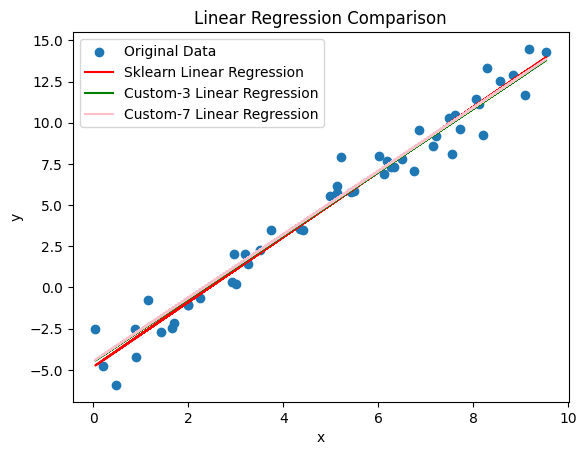

In [97]:
plt.scatter(x, y, label='Original Data')
plt.plot(x, sklearn_lr.predict(X), label='Sklearn Linear Regression', color='red')
plt.plot(x, hypothesis3(x, w, b), label='Custom-3 Linear Regression', color='green')
plt.plot(x, hypothesis7(x, v, a), label='Custom-7 Linear Regression', color='pink')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Comparison')
plt.legend()
plt.show()

## Question 2
Dataset: Air quality of an Italian city
(https://archive.ics.uci.edu/ml/datasets/Air+quality)
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multi Sensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Missing values are tagged with -200 values.

Your objective is to predict the Relative Humidity of a given point of time based on all other attributes
affecting the change in RH.

(i) Perform the data pre-processing steps on the dataset as explained in the class. Handle missing values, get insights from correlation matrix and deal with outliers.

(ii) Split the dataset into a 85:15 ratio into training and test dataset using the sklearn library.

(iii) Train a linear regression model from scratch using only numpy, pandas and matplotlib and train a linear regression model using the sklearn library on the training dataset.

(iv) Calculate the r2 score and mean squared error using the test dataset. Compare the results obtained and plot your results.


### Importing Data, Libraries and Functions

In [98]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [99]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

### Data Preprocessing - Handling Missing Values

In [100]:
# Identify non-numeric columns
non_nums = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Drop non-numeric columns
df = df.drop(columns=non_nums)


df.replace(-200, np.nan, inplace=True)
# Impute missing values (replace NaN with the mean, you can choose other strategies)
df_imputed = df.fillna(df.mean())

#Checking for nan values
print(df_imputed.isna().sum())

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


### Data Preprocessing - Correlation Matrix


Correlation Matrix:


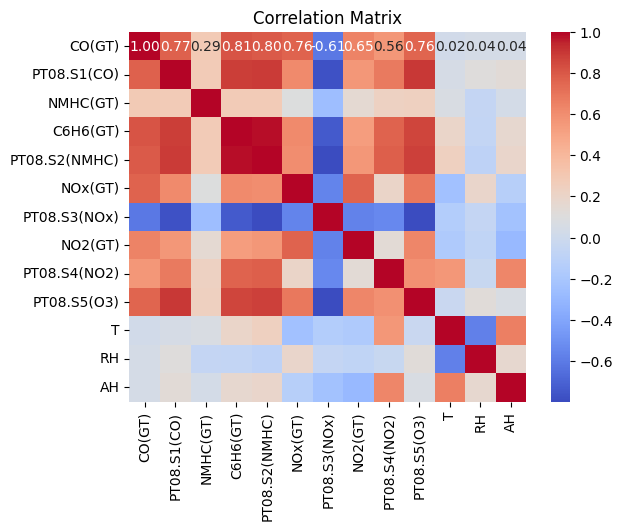

In [101]:
print("\nCorrelation Matrix:")
correlation_matrix = df_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Data Preprocessing - Handling Outliers

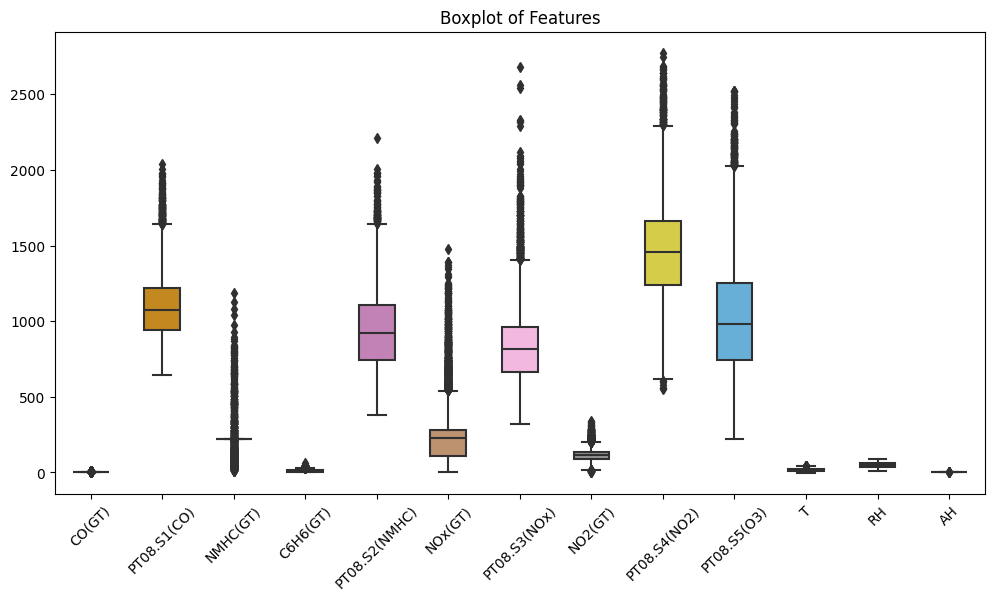

In [102]:
# To visualize the distribution and detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_imputed, orient='v', width=0.5, palette='colorblind')
plt.title('Boxplot of Features')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

In [103]:
# Using Z-score
z_scores = np.abs(zscore(df_imputed))
outliers = (z_scores > 3).all(axis=1)
df_no_outliers = df_imputed[~outliers]

### Train-Test Split

In [104]:
X = df_no_outliers.drop('RH', axis=1)  # Features
y = df_no_outliers['RH']   # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Using Scratch Implementation of Linear Regression

In [105]:
# Add a column of ones for the bias term
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Calculate parameters using the normal equation
theta = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train.values.reshape(-1, 1)

# Add a column of ones to X_test for the bias term
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Making predictions on the test set
y_pred = X_test_bias @ theta

### Using Scikit-Learn Linear Regression

In [106]:
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_sklearn = model.predict(X_test)

### R2 Score and MSE Calculation along with plots

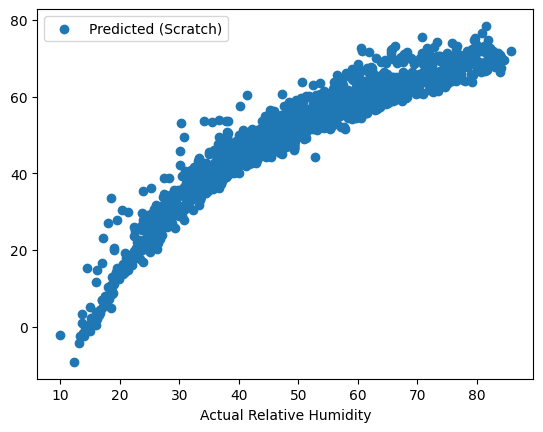

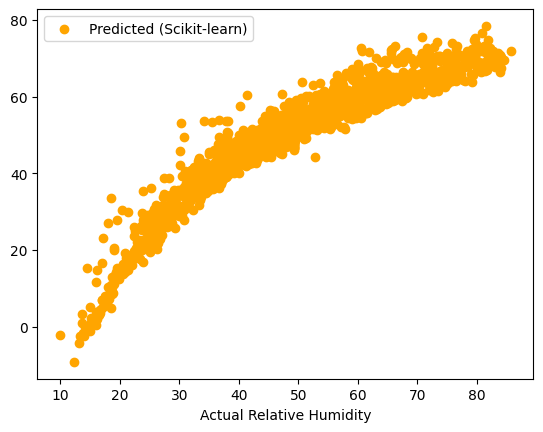

In [107]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Calculating R-squared score and mean squared error for the model from scratch
r2_score_scratch = r2_score(y_test, y_pred)
mse_scratch = mean_squared_error(y_test, y_pred)

# Calculating R-squared score and mean squared error for the scikit-learn model
r2_score_sklearn = model.score(X_test, y_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)


r2_scores = [r2_score_scratch, r2_score_sklearn]
mse_values = [mse_scratch, mse_sklearn]

plt.scatter(y_test, y_pred, label='Predicted (Scratch)')
plt.xlabel('Actual Relative Humidity')
plt.legend()
plt.show()

plt.scatter(y_test, y_pred_sklearn, label='Predicted (Scikit-learn)', color='orange')
plt.xlabel('Actual Relative Humidity')
plt.legend()
plt.show()